%Company name%: Hometask

As a financial institution regulated by the FCA, %Company name% has the obligation to verify the identity of all customers who want to open a %Company name% account. Each prospective customer has to go through a Know Your Customer (KYC) process by submitting a government-issued photo ID and a facial picture of themselves to our partner, Veritas. Veritas then would perform 2 checks:

• Document check: To verify that the photo ID is valid and authentic; • Facial Similarity check: To verify that the face in the picture is the same with that on the submitted ID.

The customer will ‘pass’ the KYC process and get onboarded if the results of both Document and Facial Similarity checks are ‘clear’. If the result of any check is not ‘clear’, the customer has to submit all the photos again.

The “pass rate” is defined as the number of customers who pass both the KYC process divided by the number of customers who attempt the process. Each customer has up to 2 attempts. The pass rate has decreased substantially in the recent period.

Please write a report that outlines the root causes and suggest solutions.

Relevant files: • Reports of all Facial Similarity checks • Reports of all Document checks • veritas.html - API documentation of Veritas explaining some terms used in the reports.

The candidate is free to use Excel or any scripting language to parse and analyse the data. Please show all your work (including your code if applicable) and assumptions as well as provide a pdf / keynote with your findings (outcomes).

Good luck!

# Початок аналізу 

In [1]:
import pandas                 as pd 
import numpy                  as np 
from matplotlib import pyplot as plt 
import seaborn                as sns 
plt.style.use('dark_background')

In [3]:
doc  = pd.read_csv('C:/Users/tuf/Downloads/doc_reports_sample.csv')
face = pd.read_csv('C:/Users/tuf/Downloads/face_reports_sample.csv')

Подивимося на дані.

In [4]:
doc.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,NaN,clear,NaN,clear,30e11e95e30748f485a2271ca5e6abb8,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,NaN,clear,NaN,clear,4c0bfde8eb2249ed820e1f61d3ec3e33,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear
2,27988,73679363dccc46fa9f34a4fefd0d76e3,clear,clear,clear,clear,clear,2017-05-29 15:07:04,clear,NaN,NaN,clear,clear,clear,c5004fd1fc1d4e36a11433b70d960867,clear,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear
3,27529,07857065dfa64db386739ec4fff47856,consider,clear,clear,clear,clear,2017-05-26 19:00:35,clear,NaN,NaN,clear,clear,consider,e4b26d4ddda545c9931a0a845cd65109,clear,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",caution
4,47987,9f887805b2af49069349ff107e0bca01,clear,clear,clear,clear,clear,2017-05-29 14:38:21,clear,NaN,NaN,clear,clear,clear,8ead2b23ef664e4d85fae798a7d5d52c,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",clear


Давайте подивимося на кількість рядків і стовпців.

In [5]:
doc.shape

(5880, 19)

На даному етапі я вирішив перевірити, чи дублюється наше user_id. Ми можемо побачити, що є id, які повторюються, і це логічно згідно з нашим описом завдання. Саме ці користувачі не пройшли верифікацію з першої спроби.

In [6]:
doc.user_id.value_counts()

user_id
12028371d6c943babadf18224ebe96cb    2
67a943369bbc48e187c3a07b35302f65    2
b6f9bdc46bb543bab45e6c34e850adf7    2
2e98fa65f2fe4d76a1ff0f30bd4048a9    2
0b3fe48a14554fa687e5152a1c20d768    2
                                   ..
61ebe1797db7451ca218573ed2da41a1    1
2e3b8deec6914a81be669462dc2bc82c    1
a3c7ba928024419dbece61de8824c66e    1
ded4e9772ac94f48b2c93c93b04ea8ae    1
be89b841eda0429999a6fa4cee5c29a9    1
Name: count, Length: 5848, dtype: int64

In [7]:
doc.dtypes

Unnamed: 0                             int64
user_id                               object
result                                object
visual_authenticity_result            object
image_integrity_result                object
face_detection_result                 object
image_quality_result                  object
created_at                            object
supported_document_result             object
conclusive_document_quality_result    object
colour_picture_result                 object
data_validation_result                object
data_consistency_result               object
data_comparison_result                object
attempt_id                            object
police_record_result                  object
compromised_document_result           object
properties                            object
sub_result                            object
dtype: object

Переведемо наші дати з рядкового формату в формат datetime.

In [8]:
doc['created_at'] = pd.to_datetime(doc.created_at, format='%Y-%m-%d %H:%M:%S')

In [9]:
doc.dtypes

Unnamed: 0                                     int64
user_id                                       object
result                                        object
visual_authenticity_result                    object
image_integrity_result                        object
face_detection_result                         object
image_quality_result                          object
created_at                            datetime64[ns]
supported_document_result                     object
conclusive_document_quality_result            object
colour_picture_result                         object
data_validation_result                        object
data_consistency_result                       object
data_comparison_result                        object
attempt_id                                    object
police_record_result                          object
compromised_document_result                   object
properties                                    object
sub_result                                    

Подивимося на мінімальну та максимальну дату.

In [10]:
doc.created_at.min()

Timestamp('2017-05-23 17:25:05')

In [11]:
doc.created_at.max()

Timestamp('2017-10-31 22:06:10')

In [12]:
doc.result.value_counts()

result
clear       4406
consider    1474
Name: count, dtype: int64

In [13]:
doc.sub_result.value_counts()

sub_result
clear        4406
rejected      889
caution       525
suspected      60
Name: count, dtype: int64

За допомогою аргументу dt витягнем місяць з дати, щоб мати можливість групувати дані за місяцями. Також, для зручності, витягнем назви місяців.

In [14]:
doc['month'] = doc.created_at.dt.month

In [15]:
doc['month_name'] = doc.created_at.dt.month_name()

Далі створимо зведену таблицю, де ми розглянемо розподіл rejected, caution, suspected, оскільки ці три типи вважаються неуспішними у системі. Наше завдання - визначити, після якого часу саме розпочалися скасування.

In [16]:
doc.pivot_table(columns='sub_result',index='month', values = 'result', aggfunc = 'count').reset_index()

sub_result,month,caution,clear,rejected,suspected
0,5,2.0,56.0,NaN,NaN
1,6,6.0,267.0,1.0,2.0
2,7,21.0,1013.0,96.0,3.0
3,8,35.0,1017.0,165.0,11.0
4,9,115.0,901.0,220.0,17.0
5,10,346.0,1152.0,407.0,27.0


На даному етапі ми зробимо відносно поверхневий аналіз, де покищо просто розглянемо закономірності і не будемо виконувати математичні доведення. Тут ми відіберемо саме ті події, які відбулися після 6 місяців, оскільки ми помітили в попередній таблиці, що перевірка почала сильно давати скасування саме після 6 місяців. Тут ми відіберемо саме тип 'rejected' і розглянемо дані, далі ми переведемо наші дані в числовий формат, де зможемо більш детально досліджувати вже статистику.

In [17]:
doc.query('month > 6 and sub_result == "rejected"').head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,...,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result,month,month_name
343,173060,d3b53f315f574fbbb6815b6d79c97cd8,consider,NaN,consider,NaN,unidentified,2017-07-12 14:03:21,clear,NaN,...,NaN,NaN,NaN,62f820f1ddde4b72bced5ec576f6f90d,NaN,NaN,{},rejected,7,July
345,169235,7110a661f0504bdab39c35b6fe78f013,consider,NaN,consider,NaN,unidentified,2017-07-16 18:22:18,clear,NaN,...,NaN,NaN,NaN,89c07b06a360475c83366d7d5fadfc50,NaN,NaN,{},rejected,7,July
355,173188,f6c75ec8113f4072bb02e0cc49a84bbc,consider,NaN,consider,NaN,unidentified,2017-07-11 22:18:53,clear,NaN,...,NaN,NaN,NaN,1c60216eaec34da1899056fbffcc5a6b,NaN,NaN,{},rejected,7,July
361,168038,161bf8c0b47a4c09bb01fe6cf43ba038,consider,NaN,consider,NaN,unidentified,2017-07-18 13:32:30,clear,NaN,...,NaN,NaN,NaN,53214463b0e24f02aca0717bd2552781,NaN,NaN,{},rejected,7,July
367,160654,ca5b52b44fff4847b779b9db5e865c49,consider,NaN,consider,NaN,unidentified,2017-07-26 21:05:01,clear,NaN,...,NaN,NaN,NaN,6b00da82c8a64adf93ef6a8a445b0fd3,NaN,NaN,{},rejected,7,July


На перший погляд, здається, що є проблеми з технічною частиною. Є пропущені значення в таких метриках, як: visual_authenticity_result, conclusive_document_quality_result, colour_picture_result, data_validation_result, data_consistency_result. У подальшому, змінна 'result' не надає нам 'clear'.

In [211]:
#doc.query('month == 7 and sub_result == "rejected"').head()

In [19]:
# doc.query('month == 8 and sub_result == "rejected"').head()

In [20]:
# doc.query('month == 9 and sub_result == "rejected"').head()

In [21]:
# doc.query('month == 10 and sub_result == "rejected"').head()

In [22]:
#doc.query('month > 6 and sub_result == "caution"')


Далі ми перетворили наші рядкові значення в числові.

In [23]:
doc['result_flag'] = doc.result.apply( lambda x:  1 if x == 'rejected' else 0)

In [24]:
doc['pass_rate'] = doc.result.apply( lambda x:  1 if x == 'clear' else 0)

Потім ми перетворили наші рядкові значення в числові.

In [25]:
doc.groupby('month')['pass_rate'].agg(['count','mean'])

,count,mean
month,,
5,58,0.965517
6,276,0.967391
7,1133,0.894086
8,1228,0.828176
9,1253,0.719074
10,1932,0.596273


Подивимося на динаміку нашої метрики за допомогою графіка.

<Axes: xlabel='month'>

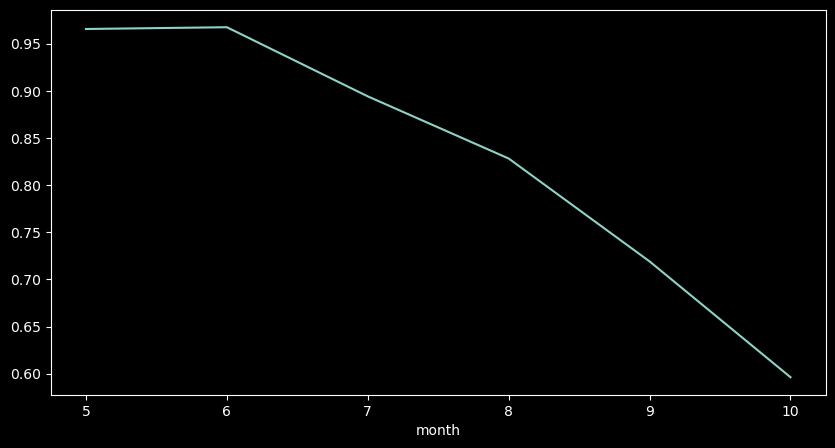

In [213]:
plt.figure(figsize=(10,5))
doc.groupby('month')['pass_rate'].agg('mean').plot()

# Аналіз таблиці 'Face'

Проведемо аналогічні дії щодо таблиці з обличчями. Перетворимо наші дані і подивимося на pass_rate.

In [27]:
face.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,58,ecee468d4a124a8eafeec61271cd0da1,clear,clear,2017-06-20 17:50:43,clear,clear,{},9e4277fc1ddf4a059da3dd2db35f6c76
1,76,1895d2b1782740bb8503b9bf3edf1ead,clear,clear,2017-06-20 13:28:00,clear,clear,{},ab259d3cb33b4711b0a5174e4de1d72c
2,217,e71b27ea145249878b10f5b3f1fb4317,clear,clear,2017-06-18 21:18:31,clear,clear,{},2b7f1c6f3fc5416286d9f1c97b15e8f9
3,221,f512dc74bd1b4c109d9bd2981518a9f8,clear,clear,2017-06-18 22:17:29,clear,clear,{},ab5989375b514968b2ff2b21095ed1ef
4,251,0685c7945d1349b7a954e1a0869bae4b,clear,clear,2017-06-18 19:54:21,clear,clear,{},dd1b0b2dbe234f4cb747cc054de2fdd3


In [219]:
face['created_at'] = pd.to_datetime(face.created_at, format='%Y-%m-%d %H:%M:%S')

In [220]:
face['month'] = face.created_at.dt.month

In [225]:
face['pass_rate'] = face.result.apply( lambda x:  1 if x == 'clear' else 0)

In [226]:
face.groupby('month')['pass_rate'].agg(['count','mean'])

,count,mean
month,,
5,58,0.862069
6,276,0.938406
7,1133,0.915269
8,1228,0.920195
9,1253,0.934557
10,1932,0.965839


І на цьому графіку ми можемо побачити динаміку pass_rate. Тут картина, очевидно, інша: був невеликий спад після 6 місяців, але потім метрика починає зростати. Отже, на цьому етапі ми вже можемо припустити, що в глобальному розумінні pass_rate падає, ймовірно, з причин, вказаних у першій таблиці. Далі об'єднаємо таблиці і подивимося вже на злиті дані.

<Axes: xlabel='month'>

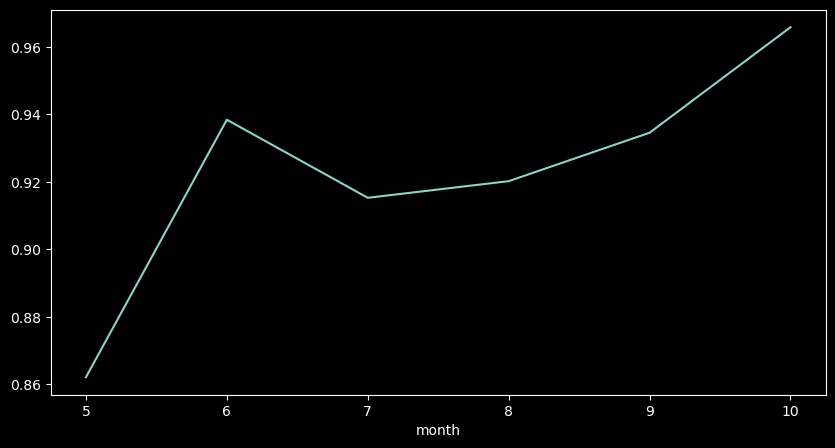

In [227]:
plt.figure(figsize=(10,5))
face.groupby('month')['pass_rate'].agg('mean').plot()

Тепер давайте розглянемо унікальні рядки. Вони повинні співпадати за кількістю, оскільки при об'єднанні, якщо є дублікати, виникає так зване "декартовий добуток", і дані будуть множитися.

In [28]:
doc.user_id.nunique()

5848

In [29]:
face.user_id.nunique()

5848

In [30]:
df = doc.merge(face,how='left',on = ['user_id','attempt_id'],suffixes = ['_doc','_face'])

In [31]:
df.head()

,Unnamed: 0_doc,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,...,month_name,result_flag,pass_rate,Unnamed: 0_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,...,May,0,1,27241,consider,consider,2017-05-25 08:38:56,clear,clear,{'score': 0.42}
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,...,May,0,1,28369,clear,clear,2017-05-31 08:12:51,clear,clear,{'score': 0.61}
2,27988,73679363dccc46fa9f34a4fefd0d76e3,clear,clear,clear,clear,clear,2017-05-29 15:07:04,clear,NaN,...,May,0,1,27988,consider,NaN,2017-05-29 15:07:04,consider,clear,{}
3,27529,07857065dfa64db386739ec4fff47856,consider,clear,clear,clear,clear,2017-05-26 19:00:35,clear,NaN,...,May,0,0,27529,clear,clear,2017-05-26 19:00:35,clear,clear,{'score': 0.65}
4,47987,9f887805b2af49069349ff107e0bca01,clear,clear,clear,clear,clear,2017-05-29 14:38:21,clear,NaN,...,May,0,1,47987,clear,clear,2017-05-29 14:38:21,clear,clear,{'score': 0.59}


Після об'єднання наших таблиць моєю стратегією було відібрати людей, які з першого разу не змогли пройти верифікацію, і ретельно дослідити їхню поведінку.

In [34]:
duplicated_users = df.user_id\
                     .value_counts()\
                     .to_frame()\
                     .query('count>1')\
                     .reset_index().user_id

In [35]:
duplicated_users

0     12028371d6c943babadf18224ebe96cb
1     67a943369bbc48e187c3a07b35302f65
2     b6f9bdc46bb543bab45e6c34e850adf7
3     2e98fa65f2fe4d76a1ff0f30bd4048a9
4     0b3fe48a14554fa687e5152a1c20d768
5     f218379dd76b4058958450cb9aaea143
6     0a743f7f87884a51bd8c165e0d3e70ed
7     176a83a802e04eb8b36e7c69731aeda4
8     1b7a0094e1174512a16f36885aaf5187
9     76e5f56153ee4fbdb80372e2a6425622
10    d05a9ec2f1a54c03942b6fc9fd6b44cc
11    5ccac3c8cb00411e86ef8ebf41e8c86d
12    0b677d16a072467eb95dd396e25840d9
13    b3b7554c4ea443758809912ef11b525c
14    c835775c51f347868c15198f7f7ee9d5
15    730ef3d0916747ba98d6b5ab150fdbec
16    cb300e2235c848598e410662c71d51d6
17    54c536e2b4894a88a0cc42c156548e1f
18    e1419879e0f948a191bc3a9ea90e0fdd
19    9a2239187ebb404c9765c6867f4270a5
20    932a394bb5754565b221af3c7e51c11e
21    aac901afba47473a8302fa7493f2f121
22    a7661341ef9d4852bc72d1fc38bec51d
23    527691d1867747d58a9357421f61a2b1
24    6a556fd0048b4912b5a3a8a9b61a41ba
25    bfc44280c2fd4ba7a57

In [36]:
duplicated_users = df[df['user_id'].isin(duplicated_users)]

In [37]:
duplicated_users = duplicated_users.sort_values('user_id')

In [38]:
duplicated_users['result_doc'] = duplicated_users.result_doc.replace('consider',0).replace('clear',1)

In [39]:
duplicated_users['result_face'] = duplicated_users.result_face.replace('consider',0).replace('clear',1)

Через цей код ми розглядали середні значення по кінцевому результату за основними метриками. Тільки для тих користувачів, які з першого разу не пройшли верифікацію. І картина тут така, що в середньому за вимірами, пов'язаними з документами, помилка менша вдвічі, ніж за перевіркою обличчя.Це також може свідчити про те, що проблема знаходиться на боці даних, пов'язаних з документами.

In [40]:
duplicated_users.agg({'result_doc': ['count','mean']})

,result_doc
count,64.000000
mean,0.421875


In [41]:
duplicated_users.agg({'result_face': ['count','mean']})

,result_face
count,64.000000
mean,0.890625


In [42]:
duplicated_users['created_at_doc'] = pd.to_datetime(duplicated_users.created_at_doc, format='%Y-%m-%d %H:%M:%S')

In [43]:
duplicated_users.created_at_doc

2989   2017-09-30 09:55:07
3755   2017-09-30 10:06:16
3367   2017-09-19 17:58:58
2914   2017-09-19 17:39:42
1588   2017-08-31 22:30:14
               ...        
3853   2017-09-19 20:27:06
700    2017-07-17 13:26:25
1266   2017-07-17 13:39:47
780    2017-07-20 15:39:32
1406   2017-07-20 18:46:48
Name: created_at_doc, Length: 64, dtype: datetime64[ns]

In [44]:
duplicated_users['month'] = duplicated_users.created_at_doc.dt.month

In [45]:
duplicated_users['final_result'] = duplicated_users.result_doc * duplicated_users.result_face

In [46]:
duplicated_users.query('final_result==0').month.value_counts()

month
10    16
9     15
8      4
7      3
6      2
Name: count, dtype: int64

Тут ми побачили, що остаточно, коли перевірку не пройшли, найбільше випадків сталося в 9 та 10 місяцях (серед тих, хто не пройшов вдруге).

тепер попрацюємо з основною таблицею та розрахуємо нашу головну метрику

In [48]:
df['pass_rate'] = (df[['result_doc','result_face']].sum(axis=1) == 2)*1

In [49]:
df.columns

Index(['Unnamed: 0_doc', 'user_id', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result', 'properties_doc',
       'sub_result', 'month', 'month_name', 'result_flag', 'pass_rate',
       'Unnamed: 0_face', 'result_face', 'face_comparison_result',
       'created_at_face', 'facial_image_integrity_result',
       'visual_authenticity_result_face', 'properties_face'],
      dtype='object')

In [50]:
flags = ['pass_rate','result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result',
       'police_record_result', 'compromised_document_result',
       'sub_result', 'result_face',
       'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_face']

в подальшому ми замінимо дані типу рядка на числа, такі як бінарні результати. Для цього ми відіберемо всі наші метрики і потім розглядатимемо їх статистику.

Також сконвертуємо наші дані

In [51]:
df['created_at_doc'] = pd.to_datetime(df.created_at_doc, format='%Y-%m-%d %H:%M:%S')

In [52]:
df['month'] = df.created_at_doc.dt.month

In [53]:
df.dtypes

Unnamed: 0_doc                                 int64
user_id                                       object
result_doc                                    object
visual_authenticity_result_doc                object
image_integrity_result                        object
face_detection_result                         object
image_quality_result                          object
created_at_doc                        datetime64[ns]
supported_document_result                     object
conclusive_document_quality_result            object
colour_picture_result                         object
data_validation_result                        object
data_consistency_result                       object
data_comparison_result                        object
attempt_id                                    object
police_record_result                          object
compromised_document_result                   object
properties_doc                                object
sub_result                                    

У нас є лише один позитивний результат, який має значення "clear", всі інші ми розглядаємо як непройдену верифікацію.

In [55]:
df = df.replace('clear',1).replace('consider',0).replace('caution',0).replace('rejected',0).replace('suspected',0).replace('unidentified',0)

In [56]:
user_to_drop = duplicated_users.user_id

In [57]:
df[~df['user_id'].isin(user_to_drop)]['user_id'].agg(['count','nunique'])

count      5816
nunique    5816
Name: user_id, dtype: int64

Тут ми видалили користувачів, які пройшли другий раз верифікацію.

In [58]:
df = df[~df['user_id'].isin(user_to_drop)]

In [59]:
df.shape

(5816, 29)

In [60]:
df.head()

,Unnamed: 0_doc,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,...,month,month_name,result_flag,Unnamed: 0_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1.0,NaN,...,5,May,0,27241,0,0.0,2017-05-25 08:38:56,1.0,1.0,{'score': 0.42}
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1.0,NaN,...,5,May,0,28369,1,1.0,2017-05-31 08:12:51,1.0,1.0,{'score': 0.61}
2,27988,73679363dccc46fa9f34a4fefd0d76e3,1,1.0,1,1.0,1,2017-05-29 15:07:04,1.0,NaN,...,5,May,0,27988,0,NaN,2017-05-29 15:07:04,0.0,1.0,{}
3,27529,07857065dfa64db386739ec4fff47856,0,1.0,1,1.0,1,2017-05-26 19:00:35,1.0,NaN,...,5,May,0,27529,1,1.0,2017-05-26 19:00:35,1.0,1.0,{'score': 0.65}
4,47987,9f887805b2af49069349ff107e0bca01,1,1.0,1,1.0,1,2017-05-29 14:38:21,1.0,NaN,...,5,May,0,47987,1,1.0,2017-05-29 14:38:21,1.0,1.0,{'score': 0.59}


In [61]:
flags

['pass_rate',
 'result_doc',
 'visual_authenticity_result_doc',
 'image_integrity_result',
 'face_detection_result',
 'image_quality_result',
 'supported_document_result',
 'conclusive_document_quality_result',
 'colour_picture_result',
 'data_validation_result',
 'data_consistency_result',
 'data_comparison_result',
 'police_record_result',
 'compromised_document_result',
 'sub_result',
 'result_face',
 'face_comparison_result',
 'facial_image_integrity_result',
 'visual_authenticity_result_face']

сделаем опереации преобразования наших метрик

In [62]:
df.sub_result

0       1
1       1
2       1
3       0
4       1
       ..
5875    1
5876    0
5877    1
5878    1
5879    1
Name: sub_result, Length: 5816, dtype: int64

In [63]:
df.sub_result.astype('int')

0       1
1       1
2       1
3       0
4       1
       ..
5875    1
5876    0
5877    1
5878    1
5879    1
Name: sub_result, Length: 5816, dtype: int32

In [80]:
df.supported_document_result.fillna('0',inplace = True)

In [82]:
df.supported_document_result.astype('int')

0       1
1       1
2       1
3       1
4       1
       ..
5875    1
5876    1
5877    1
5878    1
5879    1
Name: supported_document_result, Length: 5816, dtype: int32

In [83]:
df.dtypes

Unnamed: 0_doc                                 int64
user_id                                       object
result_doc                                     int64
visual_authenticity_result_doc               float64
image_integrity_result                         int64
face_detection_result                        float64
image_quality_result                           int64
created_at_doc                        datetime64[ns]
supported_document_result                     object
conclusive_document_quality_result           float64
colour_picture_result                        float64
data_validation_result                       float64
data_consistency_result                      float64
data_comparison_result                       float64
attempt_id                                    object
police_record_result                         float64
compromised_document_result                  float64
properties_doc                                object
sub_result                                    

In [90]:
df.supported_document_result.fillna(0,inplace=True)

In [98]:
df['supported_document_result'] = df.supported_document_result.astype('int')

In [99]:
pd.set_option('display.max_columns', None)

Хочу відзначити, що тут та ж сама логіка, що і раніше. За такою ж схемою ми розраховуємо наш показник pass_rate. Оскільки у нас є дві колонки 'result' – одна з першої таблиці, а інша – з другої, остаточний результат буде в колонці 'result', де попередні дві колонки перемножуються, і в кінцевому підсумку отримується або 1, або 0.

In [100]:
df['pass_rate'] = (df[['result_doc','result_face']].sum(axis=1) == 2)*1

Також у нас є колонки, де є пропущені значення.

In [101]:
df[flags].isna().mean()

pass_rate                             0.000000
result_doc                            0.000000
visual_authenticity_result_doc        0.149587
image_integrity_result                0.000000
face_detection_result                 0.149759
image_quality_result                  0.000000
supported_document_result             0.000000
conclusive_document_quality_result    0.464580
colour_picture_result                 0.464580
data_validation_result                0.192228
data_consistency_result               0.484869
data_comparison_result                0.985385
police_record_result                  0.183631
compromised_document_result           0.739856
sub_result                            0.000000
result_face                           0.000000
face_comparison_result                0.058116
facial_image_integrity_result         0.003267
visual_authenticity_result_face       0.149587
dtype: float64

На мій погляд, це, можливо, найважливіша таблиця в цьому проекті, оскільки вона показує нам всю динаміку всіх наших метрик. Як можна помітити, у середньому є колонки, де особливо нічого не змінюється. Наприклад, зверніть увагу на колонки "conclusive_document_quality_result" та "image_integrity_result".

Давайте розглянемо період до 7 місяця: здається, що не існувало функції "conclusive_document_quality_result", потім з'явилося близько 600 людей. Пізніше компанія розгорнула цих користувачів, і їх з'явилося майже удвічі більше. Однак наш показник "pass_rate" знизився. Також помітно, що він суттєво впав на метриці "image_integrity_result", хоча за кількістю людей різниці практично немає, як в попередньому випадку. Ми також переконались, що наш "pass_rate" правильно відображає нашу динаміку, оскільки в ньому немає жодного пропущеного значення.

Далі ми б хотіли якось математично підтвердити, що це не випадковість, щоб зрозуміти, що цей параметр дійсно впливає на наш спад. Ми можемо помітити, що у нас є лінійний зв'язок між метриками, і в даному випадку ми можемо перевірити кореляцію.

In [102]:
df.groupby('month')[flags].agg(['count','mean']).query('month>6')

pass_rate           result_doc           visual_authenticity_result_doc  \
          count      mean      count      mean                          count   
month                                                                           
7          1123  0.846839       1123  0.894034                           1027   
8          1219  0.791632       1219  0.830189                           1057   
9          1232  0.703734       1232  0.725649                           1022   
10         1914  0.591432       1914  0.600836                           1513   

                image_integrity_result           face_detection_result  \
           mean                  count      mean                 count   
month                                                                    
7      0.983447                   1123  0.914515                  1027   
8      0.973510                   1219  0.857260                  1057   
9      0.979452                   1232  0.748377                  1021   
10     0.982816                   1914  0.621735                  1513   

                image_quality_result           supported_document_result  \
           mean                count      mean                     count   
month                                                                      
7      1.000000                 1123  0.924310                      1123   
8      0.993377                 1219  0.881050                      1219   
9      0.991185                 1232  0.837662                      1232   
10     0.996034                 1914  0.799373                      1914   

                conclusive_document_quality_result            \
           mean                              count      mean   
month                                                          
7      0.989314                                  0       NaN   
8      0.982773                                579  0.982729   
9      0.990260                               1022  0.902153   
10     0.989028                               1513  0.786517   

      colour_picture_result           data_validation_result            \
                      count      mean                  count      mean   
month                                                                    
7                         0       NaN                    974  0.991786   
8                       579  0.996546                   1005  0.991045   
9                      1022  1.000000                    970  0.984536   
10                     1513  1.000000                   1445  0.986851   

      data_consistency_result           data_comparison_result       \
                        count      mean                  count mean   
month                                                                 
7                         613  0.998369                      0  NaN   
8                         674  0.998516                      0  NaN   
9                         636  1.000000                      0  NaN   
10                        882  0.997732                      0  NaN   

      police_record_result      compromised_document_result      sub_result  \
                     count mean                       count mean      count   
month                                                                         
7                      998  1.0                           0  NaN       1123   
8                     1020  1.0                           0  NaN       1219   
9                      975  1.0                         133  1.0       1232   
10                    1473  1.0                        1380  1.0       1914   

                result_face           face_comparison_result            \
           mean       count      mean                  count      mean   
month                                                                    
7      0.894034        1123  0.916296                   1037  0.992285   
8      0.830189        1219  0.921247                   1124  0.999110

І, як ми бачимо, найкраща кореляція саме на попередніх двох метриках, і ми підтвердили нашу гіпотезу, знаходячи кореляцію.

In [103]:
df.groupby('month')[flags].agg(['mean']).query('month>6').corr().pass_rate

,,mean
pass_rate,mean,1.000000
result_doc,mean,0.999883
visual_authenticity_result_doc,mean,-0.243417
image_integrity_result,mean,0.999677
face_detection_result,mean,0.346018
image_quality_result,mean,0.984733
supported_document_result,mean,-0.321827
conclusive_document_quality_result,mean,0.999471
colour_picture_result,mean,-0.828787
data_validation_result,mean,0.756341


Як і передбачалося раніше, основні проблеми виникають на стороні першої таблиці. Це говорить нам про те, що проблема не в самих користувачах – вони не підробляють документи і т. д. Замість цього, ймовірно, система не може належним чином визначити саме візуальну частину.

In [105]:
flags_face = ['result_face',
 'face_comparison_result',
 'facial_image_integrity_result',
 'visual_authenticity_result_face']

Тут ще раз ми переконаємося, що показник "pass_rate" в метриках таблиці "face" нікуди не впав. На цьому "полі бою" все гаразд.

In [106]:
df.groupby('month')[flags_face].agg(['count','mean']).query('month>6')

result_face           face_comparison_result            \
            count      mean                  count      mean   
month                                                          
7            1123  0.916296                   1037  0.992285   
8            1219  0.921247                   1124  0.999110   
9            1232  0.935065                   1155  0.997403   
10           1914  0.966040                   1852  0.998380   

      facial_image_integrity_result           visual_authenticity_result_face  \
                              count      mean                           count   
month                                                                           
7                              1123  0.923419                            1027   
8                              1219  0.922067                            1057   
9                              1224  0.943627                            1022   
10                             1903  0.973200                            1513   

                 
           mean  
month            
7      0.983447  
8      0.973510  
9      0.979452  
10     0.982816

Тепер у нас є ще деякі дані, які зберігаються у словниках. За допомогою мови Python ми розберемо їх і подивимося на дані всередині цих словників.

In [113]:
df = pd.concat([df,df['properties_doc'].apply(eval).apply(pd.Series)],axis=1)

In [115]:
df.head()

,Unnamed: 0_doc,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_doc,sub_result,month,month_name,result_flag,Unnamed: 0_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face,pass_rate,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1,NaN,NaN,1.0,NaN,1.0,30e11e95e30748f485a2271ca5e6abb8,1.0,NaN,"{'gender': 'Female', 'document_type': 'driving...",1,5,May,0,27241,0,0.0,2017-05-25 08:38:56,1.0,1.0,{'score': 0.42},0,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1,NaN,NaN,1.0,NaN,1.0,4c0bfde8eb2249ed820e1f61d3ec3e33,1.0,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",1,5,May,0,28369,1,1.0,2017-05-31 08:12:51,1.0,1.0,{'score': 0.61},1,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,27988,73679363dccc46fa9f34a4fefd0d76e3,1,1.0,1,1.0,1,2017-05-29 15:07:04,1,NaN,NaN,1.0,1.0,1.0,c5004fd1fc1d4e36a11433b70d960867,1.0,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",1,5,May,0,27988,0,NaN,2017-05-29 15:07:04,0.0,1.0,{},0,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,27529,07857065dfa64db386739ec4fff47856,0,1.0,1,1.0,1,2017-05-26 19:00:35,1,NaN,NaN,1.0,1.0,0.0,e4b26d4ddda545c9931a0a845cd65109,1.0,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",0,5,May,0,27529,1,1.0,2017-05-26 19:00:35,1.0,1.0,{'score': 0.65},0,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,47987,9f887805b2af49069349ff107e0bca01,1,1.0,1,1.0,1,2017-05-29 14:38:21,1,NaN,NaN,1.0,1.0,1.0,8ead2b23ef664e4d85fae798a7d5d52c,1.0,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",1,5,May,0,47987,1,1.0,2017-05-29 14:38:21,1.0,1.0,{'score': 0.59},1,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN


In [116]:
df.columns

Index(['Unnamed: 0_doc', 'user_id', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result', 'properties_doc',
       'sub_result', 'month', 'month_name', 'result_flag', 'Unnamed: 0_face',
       'result_face', 'face_comparison_result', 'created_at_face',
       'facial_image_integrity_result', 'visual_authenticity_result_face',
       'properties_face', 'pass_rate', 'gender', 'document_type',
       'date_of_expiry', 'issuing_country', 'nationality', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

In [117]:
flags_dict = ['gender', 'document_type',
       'date_of_expiry', 'issuing_country', 'nationality', 'issuing_date',
       'issuing_state', 'document_version']

In [127]:
df[flags_dict].isna().mean()

gender              0.320495
document_type       0.149759
date_of_expiry      0.266334
issuing_country     0.149587
nationality         0.559663
issuing_date        0.709250
issuing_state       0.994326
document_version    0.999656
dtype: float64

Ми можемо перевірити, чи це пов'язано з якими-небудь закономірностями, такими як паспорт, національність і т. д. Наприклад, можливо, в якомусь році якась країна вирішила змінити паспорт, і система тепер не може їх пропустити, що призводить до зниження загального рейтингу.

Як ми бачимо в даному прикладі, наш показник "pass_rate" особливо не падає, але можемо також додатково розглянути графік.

In [147]:
df.groupby('document_type')['pass_rate'].agg(['mean'])

,mean
document_type,
driving_licence,0.845238
national_identity_card,0.886857
passport,0.811839
residence_permit,0.885417


In [181]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean'])

mean                                          \
month                         5         6         7         8         9    
document_type                                                              
driving_licence         0.857143  0.884211  0.917808  0.898773  0.850932   
national_identity_card  0.777778  0.919540  0.938596  0.934247  0.868895   
passport                0.842105  0.954023  0.921053  0.899408  0.811594   
residence_permit             NaN       NaN  0.937500  0.964286  0.882353   

                                  
month                         10  
document_type                     
driving_licence         0.754991  
national_identity_card  0.834244  
passport                0.620253  
residence_permit        0.722222

За моїми переконаннями, найбільше "провалився" паспорт. Загалом, всі документи йдуть на спад, але найбільше просів паспорт.

<Axes: xlabel='None,month'>

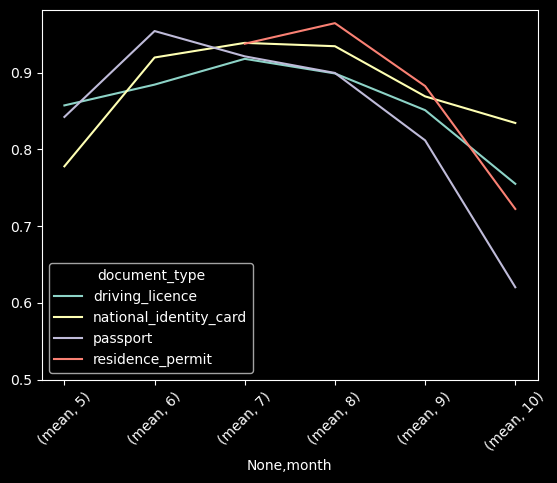

In [192]:

df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45,ylim=0.5)

Ми можемо розглянути і за гендером, чи є можливість, що, наприклад, система краще або гірше пропускає чоловіків. Як ми бачимо, ситуація є рівноважною як для чоловіків, так і для жінок.

In [196]:
df.pivot_table(index='gender',columns='month',values='pass_rate',aggfunc=['mean'])

mean                                                  
month         5         6         7         8         9         10
gender                                                            
Female  0.800000  0.925000  0.929630  0.934932  0.852349  0.731765
Male    0.862069  0.945205  0.935714  0.907666  0.828846  0.715447

<Axes: xlabel='None,month'>

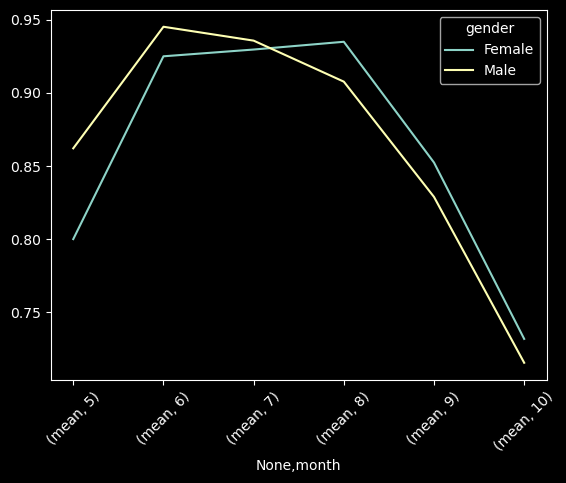

In [201]:
df.pivot_table(index='gender',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45)

В цілому я б хотів висловити наступне: основна проблема знаходиться на технічному рівні.
Зокрема, ми помітили суттєвий спад у двох метриках - "image_integrity_result" та "conclusive_document_quality_result". 
Обидві вони прийшли із таблиці, де проводиться перевірка документів. 
Ймовірно, можна зробити висновок, що тут немає підозр до фальшивих документів, але просто ці дві системи працюють не дуже ефективно.
Це, ймовірно, призвело до суттєвого зменшення нашого показника 
"pass_rate". Все це, кажучи іронічно, можна було б умістити в дві рядки висновків після вивченого достатньо обширного аналізу.